---

## **📊 Using SQL to Determine Insights**

In this section, we're **connecting our cleaned Spotify streaming history dataset to PostgreSQL** using SQLAlchemy, allowing us to efficiently run SQL queries within Jupyter Notebook.

### **🛠️ Steps in this Process:**

- 1) **Importing Required Libraries**  
   - `sqlalchemy` for managing database connections.  
   - `pandas` for handling structured data.  
   - `os` and `dotenv` to securely retrieve database credentials from a `.env` file.  
   - `matplotlib` and `seaborn` for visualization.  

- 2) **Loading Environment Variables**  
   - Using `load_dotenv()` to **securely access** database credentials stored in a hidden `.env` file.

- 3) **Setting Up SQL Connection**  
   - Constructing a **SQLAlchemy connection string** dynamically using credentials from the `.env` file.
   - Connecting to PostgreSQL using `create_engine(db_url)`, allowing for seamless interaction between Python and SQL.

- 4) **Preparing for Data Analysis & Visualization**  
   - Setting the visualization theme with `seaborn` to enhance readability for upcoming data plots.

### **Next Steps:**
With this connection established, we can now **run SQL queries** directly from Python, retrieve insights, and visualize trends in the Spotify listening history. 

---


In [3]:
from sqlalchemy import create_engine
import pandas as pd
import os
from dotenv import load_dotenv

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load environment variables
load_dotenv()

True

In [6]:
# Set visualization theme
sns.set_theme(style="darkgrid")

In [7]:
# Create the SQLAlchemy connection string for db10
db_url = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"

In [8]:
# Connect using SQLAlchemy
engine = create_engine(db_url)

---

# **Top 10 Most Played Songs from Across All Years**

In [24]:
query_top_songs = """
SELECT 
    master_metadata_track_name AS track,
    master_metadata_album_artist_name AS artist,
    COUNT(*) AS play_count
FROM (
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2015
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2016
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2017
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2018
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2019
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2020
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2021
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2022
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2023
    UNION ALL
    SELECT master_metadata_track_name, master_metadata_album_artist_name FROM spotify_history_2024
) combined
WHERE master_metadata_track_name IS NOT NULL
GROUP BY track, artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [25]:
df_top_songs = pd.read_sql(query_top_songs, engine)

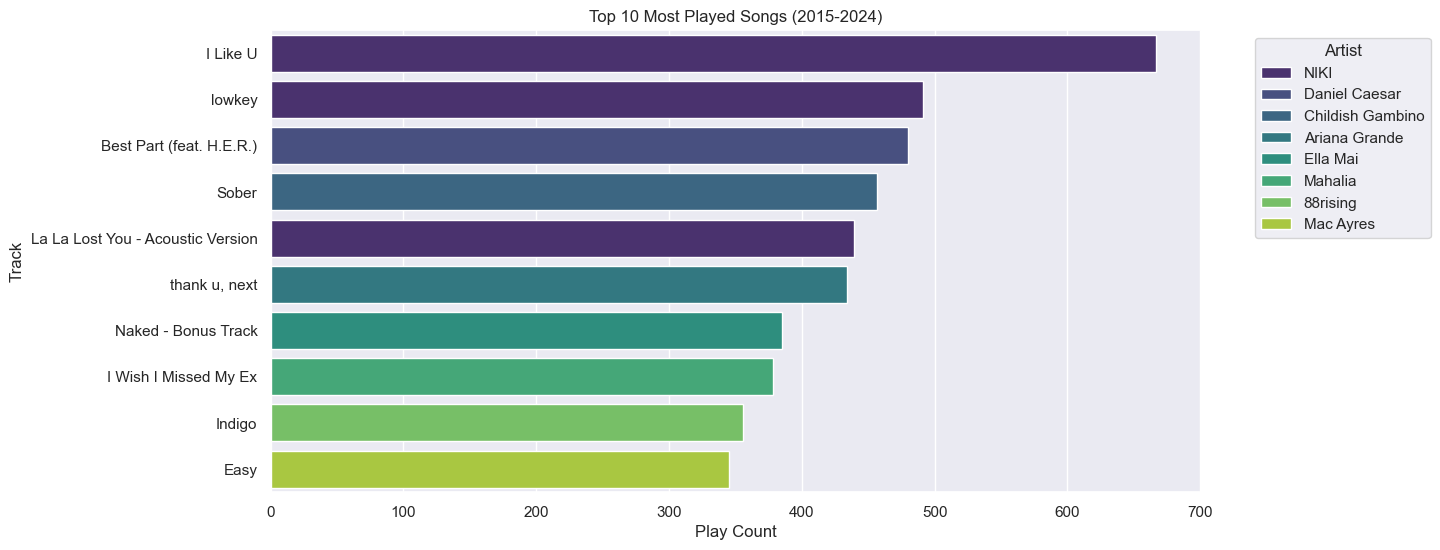

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_songs, x="play_count", y="track", hue="artist", palette="viridis")
plt.xlabel("Play Count")
plt.ylabel("Track")
plt.title("Top 10 Most Played Songs (2015-2024)")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

# **Top 10 Artists from Across All Years**

In [27]:
query_top_artists = """
SELECT 
    master_metadata_album_artist_name AS artist,
    COUNT(*) AS play_count
FROM (
    SELECT master_metadata_album_artist_name FROM spotify_history_2015
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2016
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2017
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2018
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2019
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2020
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2021
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2022
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2023
    UNION ALL
    SELECT master_metadata_album_artist_name FROM spotify_history_2024
) combined
WHERE master_metadata_album_artist_name IS NOT NULL
GROUP BY artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [28]:
df_top_artists = pd.read_sql(query_top_artists, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_44000\4037367294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_artists, x="play_count", y="artist", palette="magma")


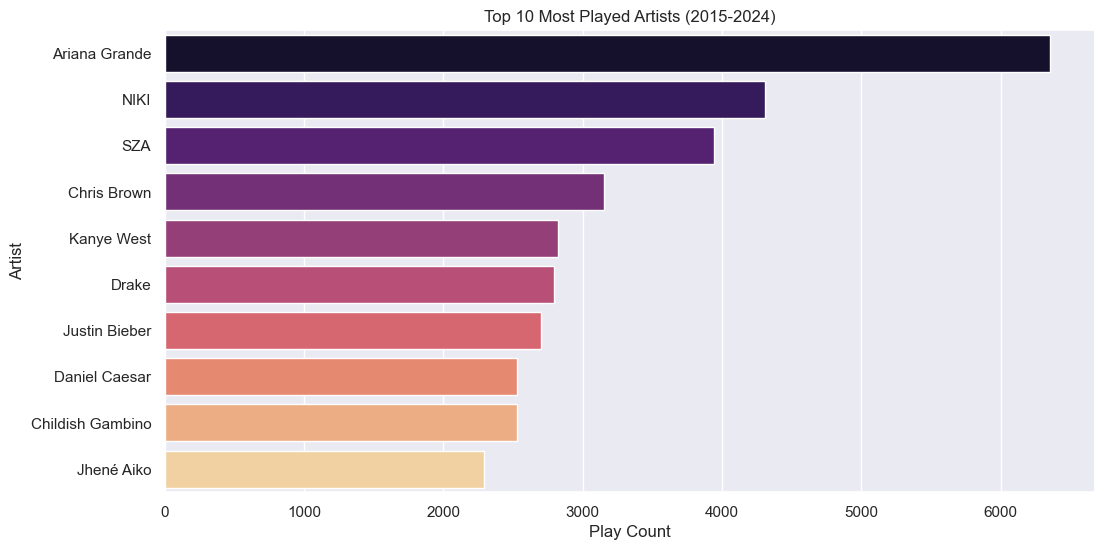

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_artists, x="play_count", y="artist", palette="magma")
plt.xlabel("Play Count")
plt.ylabel("Artist")
plt.title("Top 10 Most Played Artists (2015-2024)")
plt.show()

# **Top 10 Albums from Across All Years**

In [30]:
query_top_albums = """
SELECT 
    master_metadata_album_album_name AS album,
    master_metadata_album_artist_name AS artist,
    COUNT(*) AS play_count
FROM (
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2015
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2016
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2017
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2018
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2019
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2020
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2021
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2022
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2023
    UNION ALL
    SELECT master_metadata_album_album_name, master_metadata_album_artist_name FROM spotify_history_2024
) combined
WHERE master_metadata_album_album_name IS NOT NULL
GROUP BY album, artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [32]:
df_top_albums = pd.read_sql(query_top_albums, engine)

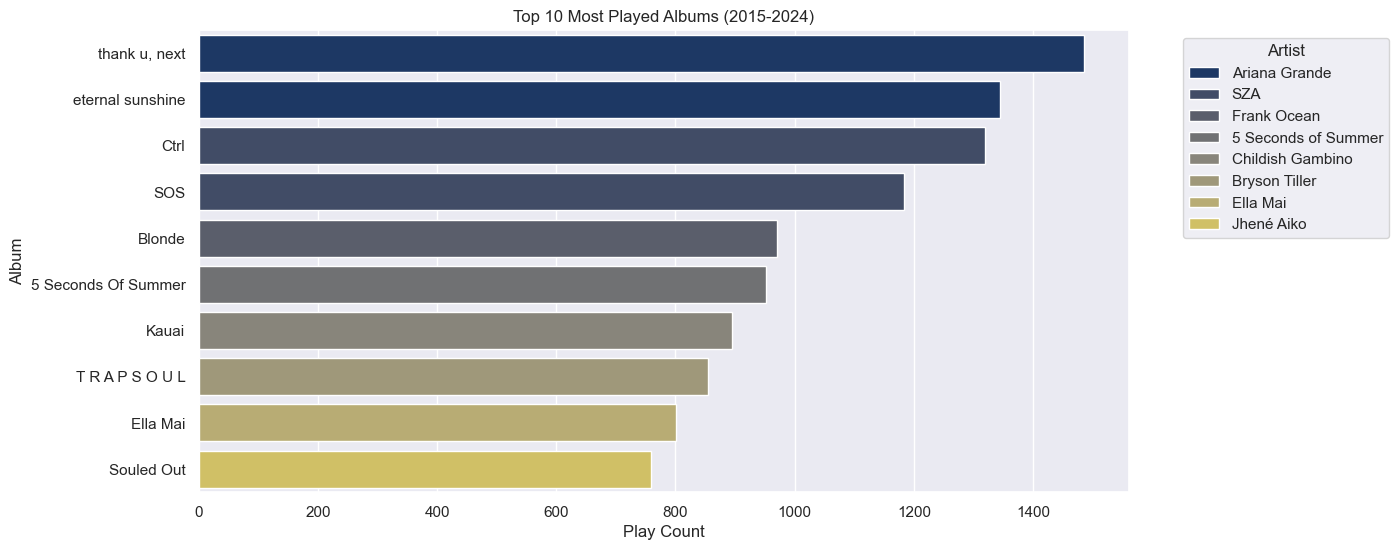

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_albums, x="play_count", y="album", hue="artist", palette="cividis")
plt.xlabel("Play Count")
plt.ylabel("Album")
plt.title("Top 10 Most Played Albums (2015-2024)")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Peak Listening Hours Across All Years (Time-Period)**

In [34]:
query_peak_hours = """
SELECT 
    CASE 
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 0 AND 5 THEN 'Late Night (12AM-5AM)'
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 6 AND 11 THEN 'Morning (6AM-11AM)'
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 12 AND 17 THEN 'Afternoon (12PM-5PM)'
        ELSE 'Evening (6PM-11PM)'
    END AS time_period,
    COUNT(*) AS play_count
FROM (
    SELECT ts FROM spotify_history_2015
    UNION ALL
    SELECT ts FROM spotify_history_2016
    UNION ALL
    SELECT ts FROM spotify_history_2017
    UNION ALL
    SELECT ts FROM spotify_history_2018
    UNION ALL
    SELECT ts FROM spotify_history_2019
    UNION ALL
    SELECT ts FROM spotify_history_2020
    UNION ALL
    SELECT ts FROM spotify_history_2021
    UNION ALL
    SELECT ts FROM spotify_history_2022
    UNION ALL
    SELECT ts FROM spotify_history_2023
    UNION ALL
    SELECT ts FROM spotify_history_2024
) combined
GROUP BY time_period
ORDER BY play_count DESC;
"""

In [35]:
df_peak_hours = pd.read_sql(query_peak_hours, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_44000\1674529393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_peak_hours["time_period"], y=df_peak_hours["play_count"], palette="viridis")


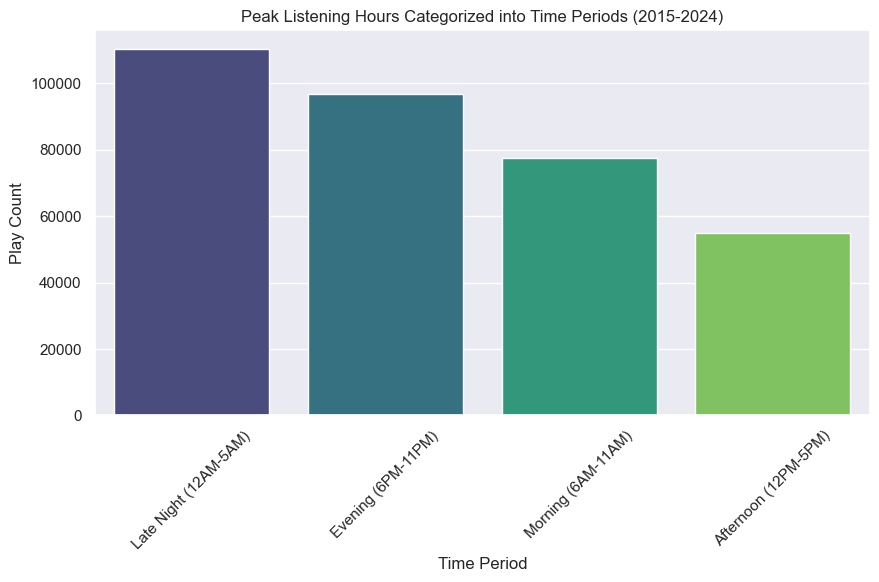

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_peak_hours["time_period"], y=df_peak_hours["play_count"], palette="viridis")
plt.xlabel("Time Period")
plt.ylabel("Play Count")
plt.title("Peak Listening Hours Categorized into Time Periods (2015-2024)")
plt.xticks(rotation=45) 
plt.show()

---

# **Monthly Trends Across All Years**

In [37]:
query_monthly_trends = """
SELECT 
    TO_CHAR(ts, 'YYYY-MM') AS month, 
    COUNT(*) AS play_count
FROM (
    SELECT ts FROM spotify_history_2015
    UNION ALL
    SELECT ts FROM spotify_history_2016
    UNION ALL
    SELECT ts FROM spotify_history_2017
    UNION ALL
    SELECT ts FROM spotify_history_2018
    UNION ALL
    SELECT ts FROM spotify_history_2019
    UNION ALL
    SELECT ts FROM spotify_history_2020
    UNION ALL
    SELECT ts FROM spotify_history_2021
    UNION ALL
    SELECT ts FROM spotify_history_2022
    UNION ALL
    SELECT ts FROM spotify_history_2023
    UNION ALL
    SELECT ts FROM spotify_history_2024
) combined
GROUP BY month
ORDER BY month;
"""

In [38]:
df_monthly_trends = pd.read_sql(query_monthly_trends, engine)

In [39]:
df_monthly_trends["month"] = pd.to_datetime(df_monthly_trends["month"])

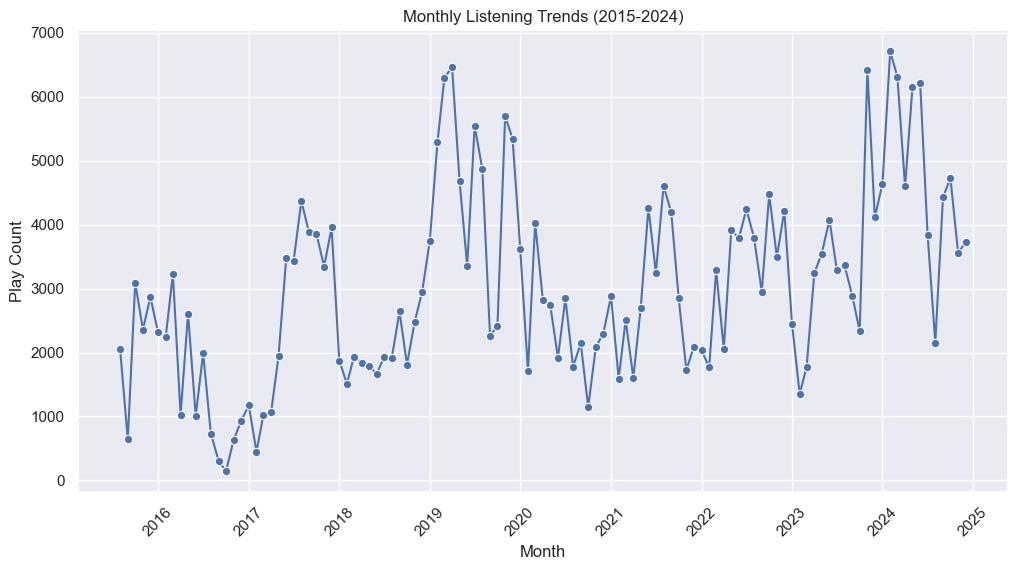

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_trends, x="month", y="play_count", marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Play Count")
plt.title("Monthly Listening Trends (2015-2024)")
plt.xticks(rotation=45) 
plt.show()

# **Top Season Across All Years**

In [41]:
query_seasonal_trends = """
SELECT 
    CASE 
        WHEN EXTRACT(MONTH FROM ts) IN (12, 1, 2) THEN 'Winter'
        WHEN EXTRACT(MONTH FROM ts) IN (3, 4, 5) THEN 'Spring'
        WHEN EXTRACT(MONTH FROM ts) IN (6, 7, 8) THEN 'Summer'
        ELSE 'Fall'
    END AS season,
    COUNT(*) AS play_count
FROM (
    SELECT ts FROM spotify_history_2015
    UNION ALL
    SELECT ts FROM spotify_history_2016
    UNION ALL
    SELECT ts FROM spotify_history_2017
    UNION ALL
    SELECT ts FROM spotify_history_2018
    UNION ALL
    SELECT ts FROM spotify_history_2019
    UNION ALL
    SELECT ts FROM spotify_history_2020
    UNION ALL
    SELECT ts FROM spotify_history_2021
    UNION ALL
    SELECT ts FROM spotify_history_2022
    UNION ALL
    SELECT ts FROM spotify_history_2023
    UNION ALL
    SELECT ts FROM spotify_history_2024
) combined
GROUP BY season
ORDER BY play_count DESC;
"""

In [42]:
df_seasonal_trends = pd.read_sql(query_seasonal_trends, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_44000\1960394467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_seasonal_trends["season"], y=df_seasonal_trends["play_count"], palette="coolwarm")


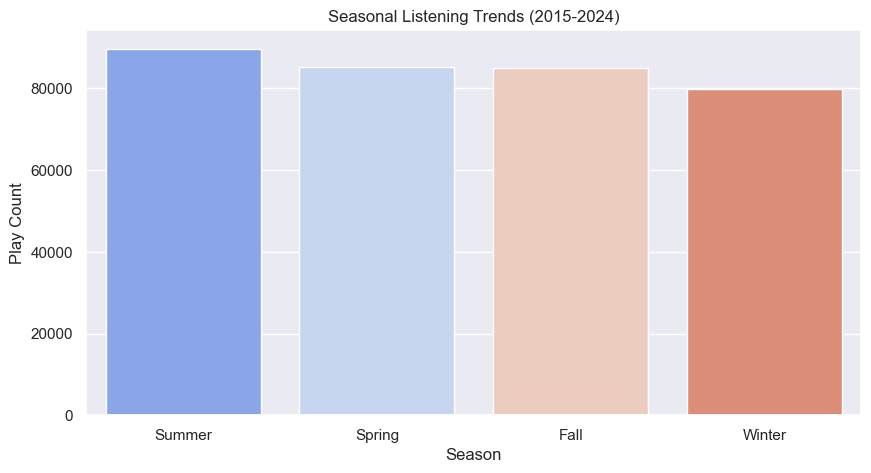

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_seasonal_trends["season"], y=df_seasonal_trends["play_count"], palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Play Count")
plt.title("Seasonal Listening Trends (2015-2024)")
plt.show()

# **Seasonal Listening Trends Across All Years**

In [44]:
query_seasonal_trends_yearly = """
SELECT 
    EXTRACT(YEAR FROM ts) AS year,
    CASE 
        WHEN EXTRACT(MONTH FROM ts) IN (12, 1, 2) THEN 'Winter'
        WHEN EXTRACT(MONTH FROM ts) IN (3, 4, 5) THEN 'Spring'
        WHEN EXTRACT(MONTH FROM ts) IN (6, 7, 8) THEN 'Summer'
        ELSE 'Fall'
    END AS season,
    COUNT(*) AS play_count
FROM (
    SELECT ts FROM spotify_history_2015
    UNION ALL
    SELECT ts FROM spotify_history_2016
    UNION ALL
    SELECT ts FROM spotify_history_2017
    UNION ALL
    SELECT ts FROM spotify_history_2018
    UNION ALL
    SELECT ts FROM spotify_history_2019
    UNION ALL
    SELECT ts FROM spotify_history_2020
    UNION ALL
    SELECT ts FROM spotify_history_2021
    UNION ALL
    SELECT ts FROM spotify_history_2022
    UNION ALL
    SELECT ts FROM spotify_history_2023
    UNION ALL
    SELECT ts FROM spotify_history_2024
) combined
GROUP BY year, season
ORDER BY year, season;
"""

In [45]:
df_seasonal_trends_yearly = pd.read_sql(query_seasonal_trends_yearly, engine)

In [46]:
df_seasonal_trends_yearly["year"] = df_seasonal_trends_yearly["year"].astype(int)

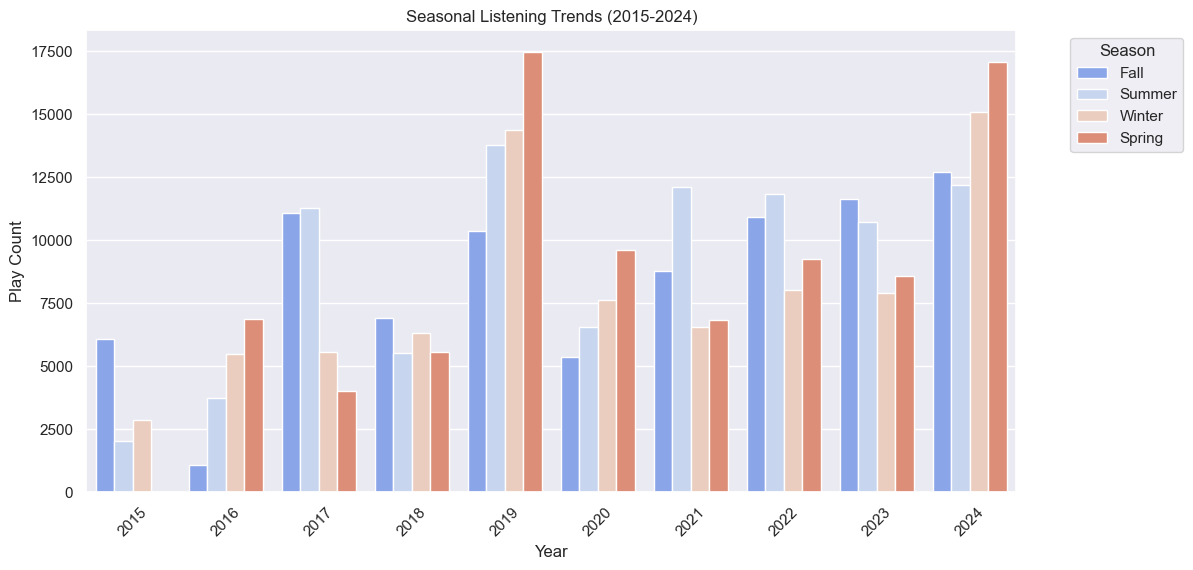

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="play_count", hue="season", data=df_seasonal_trends_yearly, palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Play Count")
plt.title("Seasonal Listening Trends (2015-2024)")
plt.xticks(rotation=45)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# **Most & Least Active Months Across All Years**

In [54]:
query_monthly_activity = """
SELECT 
    TO_CHAR(ts, 'Month') AS month,
    EXTRACT(MONTH FROM ts) AS month_number,
    COUNT(*) AS play_count
FROM (
    SELECT ts FROM spotify_history_2015
    UNION ALL
    SELECT ts FROM spotify_history_2016
    UNION ALL
    SELECT ts FROM spotify_history_2017
    UNION ALL
    SELECT ts FROM spotify_history_2018
    UNION ALL
    SELECT ts FROM spotify_history_2019
    UNION ALL
    SELECT ts FROM spotify_history_2020
    UNION ALL
    SELECT ts FROM spotify_history_2021
    UNION ALL
    SELECT ts FROM spotify_history_2022
    UNION ALL
    SELECT ts FROM spotify_history_2023
    UNION ALL
    SELECT ts FROM spotify_history_2024
) combined
GROUP BY month, month_number
ORDER BY play_count DESC;
"""

In [55]:
df_monthly_activity = pd.read_sql(query_monthly_activity, engine)

In [56]:
df_monthly_activity = df_monthly_activity.sort_values(by="month_number")

C:\Users\kcalo\AppData\Local\Temp\ipykernel_44000\4187648570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


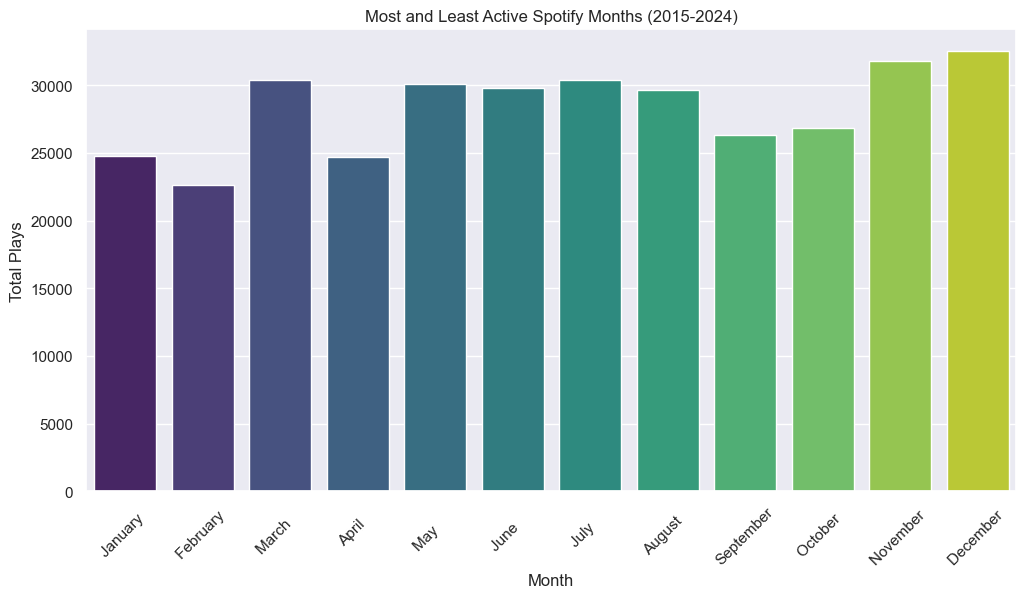

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_monthly_activity, 
    x="month", y="play_count", 
    palette="viridis"
)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Plays")
plt.title("Most and Least Active Spotify Months (2015-2024)")
plt.show()

In [62]:
# Close engine connection here
engine.dispose()